In [17]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargamos nuestro dataset
df = pd.read_csv('games_clean.csv', sep=',')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_expanded,platform_group
0,WII SPORTS,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,Everyone,Nintendo
1,SUPER MARIO BROS,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Pending,Nintendo
2,MARIO KART WII,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,Everyone,Nintendo
3,WII SPORTS RESORT,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,Everyone,Nintendo
4,POKEMON RED/POKEMON BLUE,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Pending,Nintendo


In [3]:
# Inspeccionamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
 12  rating_expanded  16444 non-null  object 
 13  platform_group   16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


*Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?*

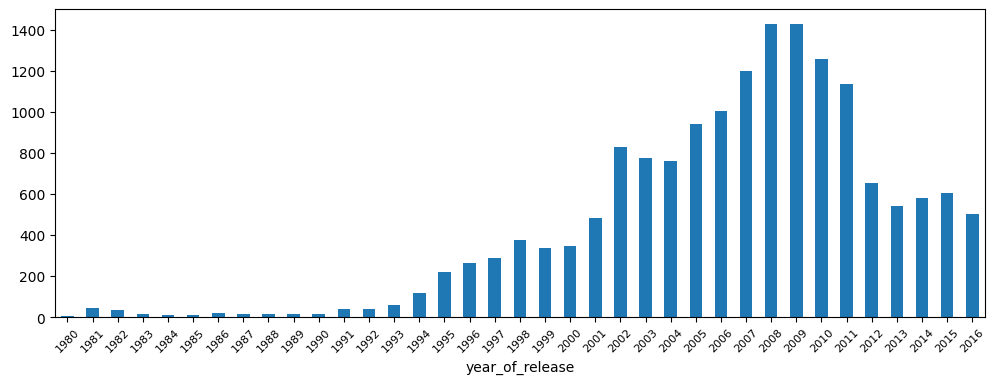

In [4]:
games_by_year = df.groupby('year_of_release')['name'].count()
plt.figure(figsize=(12,4))
plt.xticks(fontsize=8)
games_by_year.plot(
    x = 'year_of_release',
    kind='bar',
    rot = 45
)
plt.show()

#### Consideramos que desde 1995 los datos comienzan a ser significativos. Antes de esta fecha fueron muy pocos los juegos que había en el mercado

*Observa cómo varían las ventas de una plataforma a otra.*

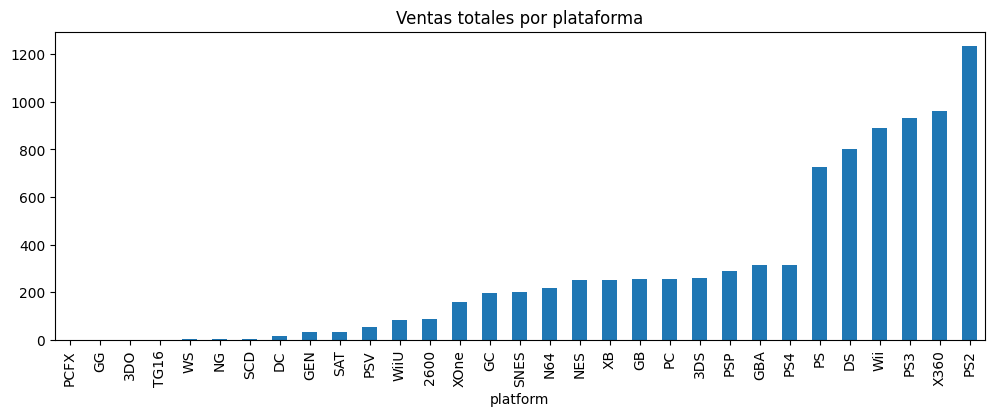

In [5]:
# Plataformas individuales con mayores ventas totales

df_by_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform.plot(
    x = 'platform',
    figsize = (12,4),
    kind = 'bar',
    legend = False,
    title = 'Ventas totales por plataforma'
)

plt.show()

#### Las plataformas que más ventas totales han tenido hasta la fecha del estudio son PS2, X360, PS3, Wii, DS y PS

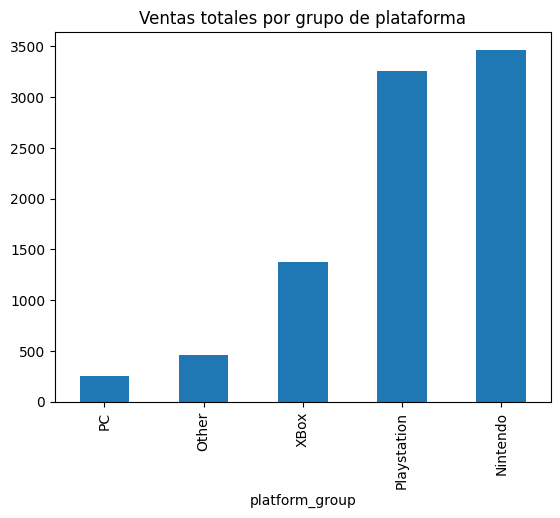

In [6]:
# Grupos de plataformas con mayores ventas totales

df_by_sales_platform_group = df.groupby('platform_group')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform_group.plot(
    kind = 'bar',
    x = 'platform_group',
    title = 'Ventas totales por grupo de plataforma',
    legend = False
)
plt.show()

#### Agrupando las plataformas en las compañías detrás de cada plataforma podemos ver que Playstation y Nintendo liderean el mercado

In [7]:
# Ordenamos dataframe por ventas totales
all_platforms_sales = df_by_sales_platform.sort_values(by='total_sales', ascending = False)

# Creamos lista de todas las plataformas
all_platforms_sales_list = df['platform'].unique().tolist()
all_platforms_sales_list

#Agrupamos por año y plataforma
all_yearly_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()


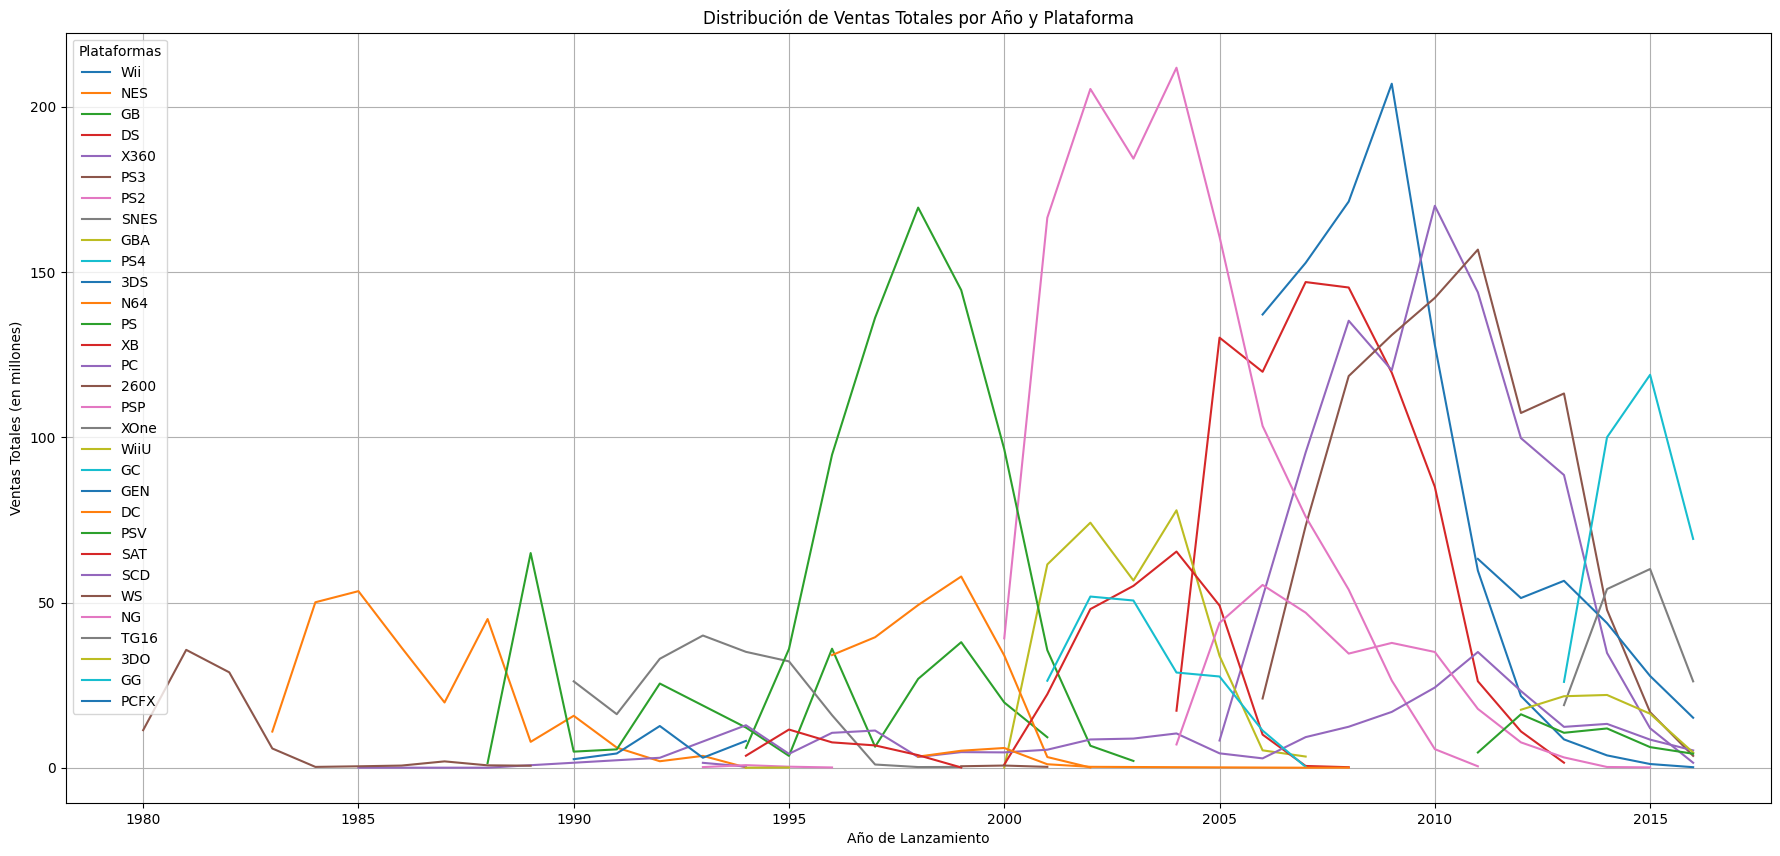

In [8]:
# Crear un gráfico de líneas para comparar todas las plataformas
plt.figure(figsize=(22, 10))

for platform in all_platforms_sales_list:
    platform_data = all_yearly_sales[all_yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Distribución de Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()


In [9]:
# Seleccionamos las plataformas con más ventas
top_sales_platforms = all_platforms_sales.head(7)
top_sales_list = top_sales_platforms['platform'].tolist() 
print(f'Top 6 platforms: {top_sales_list}')

Top 6 platforms: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']


In [10]:
# Filtramos el dataframe original por las top 6 plataformas

top_sales_df = df[df['platform'].isin(top_sales_list)]

# Agrupar por año y plataforma
yearly_sales = top_sales_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

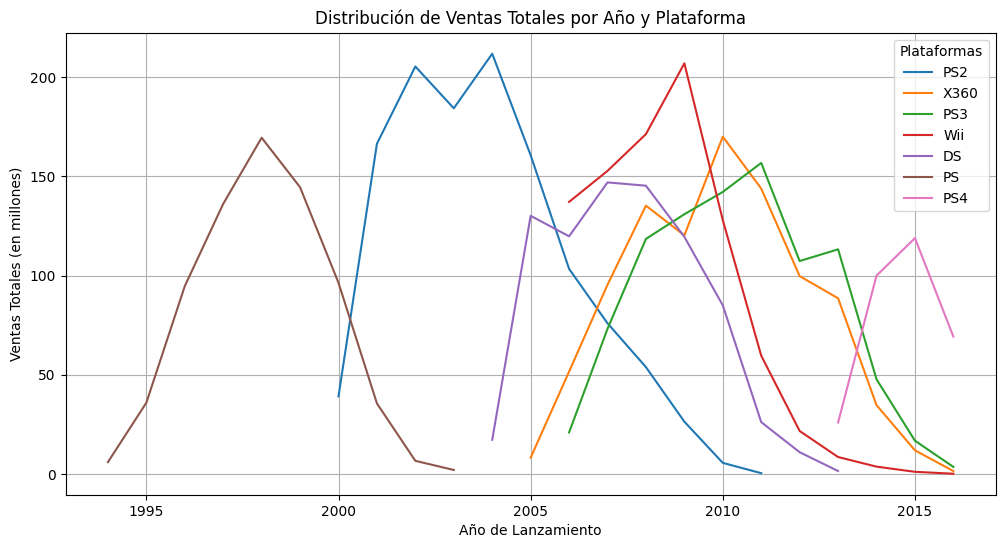

In [11]:
# Crear un gráfico de líneas para comparar las top 6 plataformas
plt.figure(figsize=(12, 6))

for platform in top_sales_list:
    platform_data = yearly_sales[yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Distribución de Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()


#### Analizando nuestro top de ventas, vemos que la vida promedio de una plataforma es de aproximadamente 10 años y cada 10 años aproximadamente nace una nueva plataforma popular.
#### Wii y PS2 han llegado a picos de venta que las otras no han tenido, aún así han sido remplazadas en ventas por otras plataformas.
#### Añadimos a PS4 para ver su comportamiento porque a pesar de que está en el top 7, es de las plataformas nuevas que están teniendo un repunte. 

*Determina para qué período debes tomar datos.* 

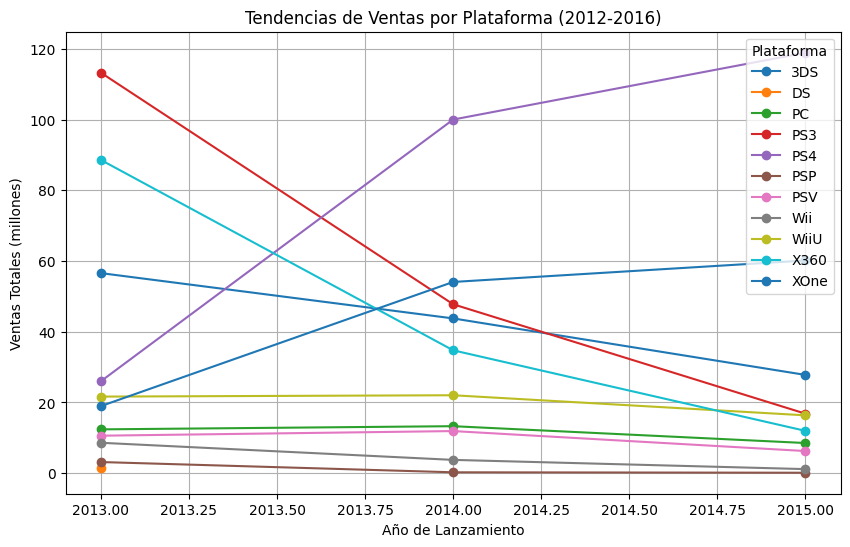

In [12]:
# Filtramos los datos para tener los datos de los últimos 4 años

filter_2012_2016 = df[ 
    (df['year_of_release'] >= 2013) &
    (df['year_of_release'] <= 2015) 
]

sales_2012_2016 = filter_2012_2016.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()

# Crear el gráfico de tendencias de ventas
plt.figure(figsize=(10, 6))
for platform in sales_2012_2016.columns:
    plt.plot(sales_2012_2016.index, sales_2012_2016[platform], marker='o', label=platform)

plt.title('Tendencias de Ventas por Plataforma (2012-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

In [13]:
sales_2012_2016.loc[2015].sort_values(ascending=False)


platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
DS         NaN
Name: 2015, dtype: float64

#### Tomando en cuenta el crecimiento de las plataformas del 2013 al 2015, vemos cuáles van en caída y cuáles van en ascenso.
#### Las dos plataformas que vemos en ascenso, y son líderes en venta, son PS4 con delantera por mucho, seguida de XOne.
#### Y ya en descenso leve tenemos a 3DS, luego en descenso más empinado, a PS3 y X360. 
#### Y por último, y manteniéndose en menos ventas, estables, Wii2, PC, PSV, Wii Y PSP.

#### Creemos que las plataformas potencialmente rentables son PS4 y XOne definitivamente. Y de ahí, en menor medida 3DS, PS3, WiiU y X360

#### Nota: descartamos las ventas hechas hasta el 2015 porque parece que las del 2016 no están completas.. si estamos haciendo análisis para el 2017 debe ser porque 2016 no ha terminado y por eso los datos de venta de ese año están tan bajos.

In [26]:
# boxplot de ventas globales de PS4
top3 = ['PS4', 'XOne', '3DS']
sales_ps4 = df[df['platform'].isin(top3)]
sales_ps4 = sales_ps4[['platform', 'total_sales']].groupby('platform')
sales_ps4



-Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
-¿Son significativas las diferencias en las ventas? 
-¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
-Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
-Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
-Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
-Echa un vistazo a la distribución general de los juegos por género. 
-¿Qué se puede decir de los géneros más rentables? 
-¿Puedes generalizar acerca de los géneros con ventas altas y bajas?